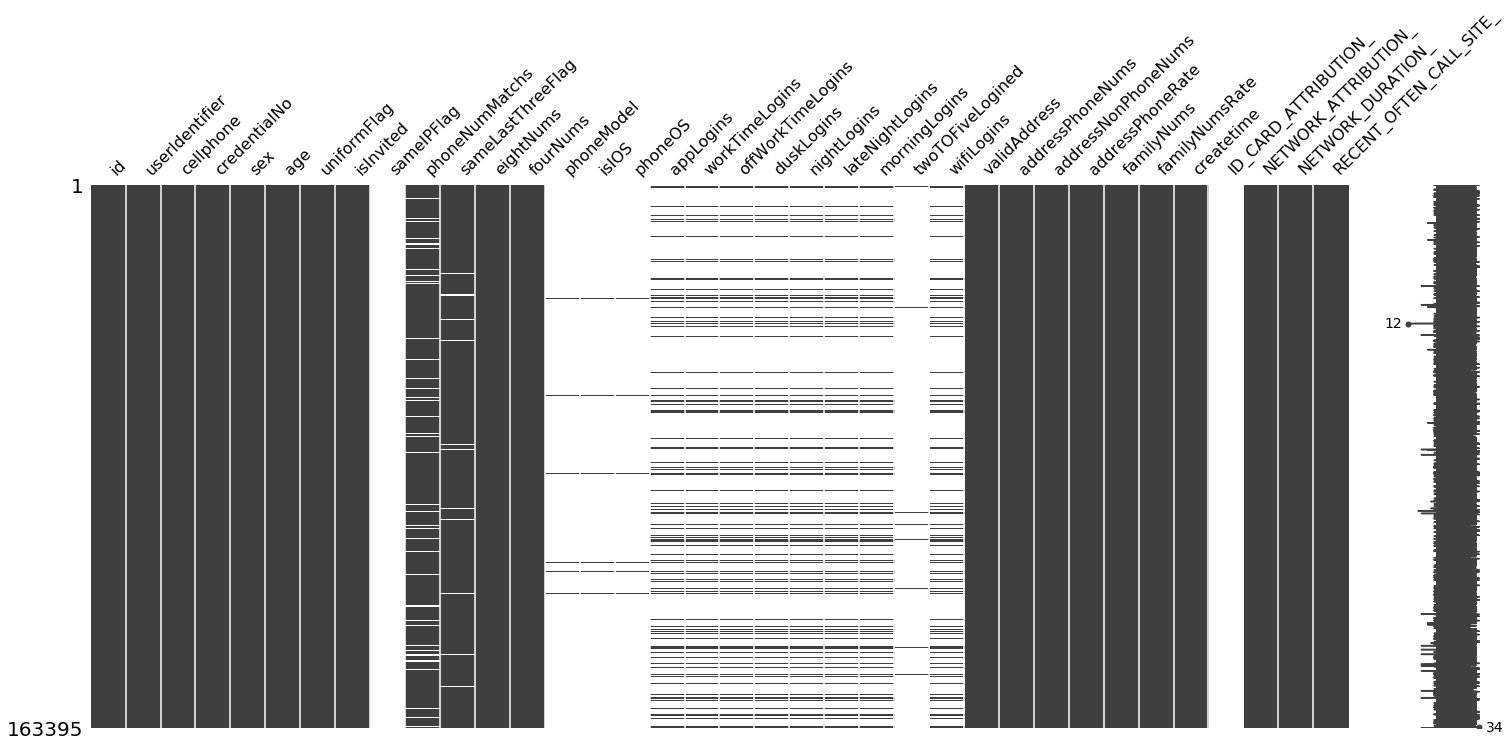

USER_IDENTIFIER_          163385
AVG(DIALING)              163385
AVG(DIALED)               163385
AVG(DIALING_COUNT_)       163385
DIALED_COUNT_             163385
avg_zhujiao               163384
avg_beijiao               163333
avg(TELEPHONE_CHARGE_)    163385
avg(SMS_COUNT_)           163385
yuqi                      163395
first_leadtime            163395
dtype: int64

In [2]:
import pandas as pd
operator_data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
import missingno as missingno
missingno.matrix(extention)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()

In [3]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M:%S").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

F:\anoconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


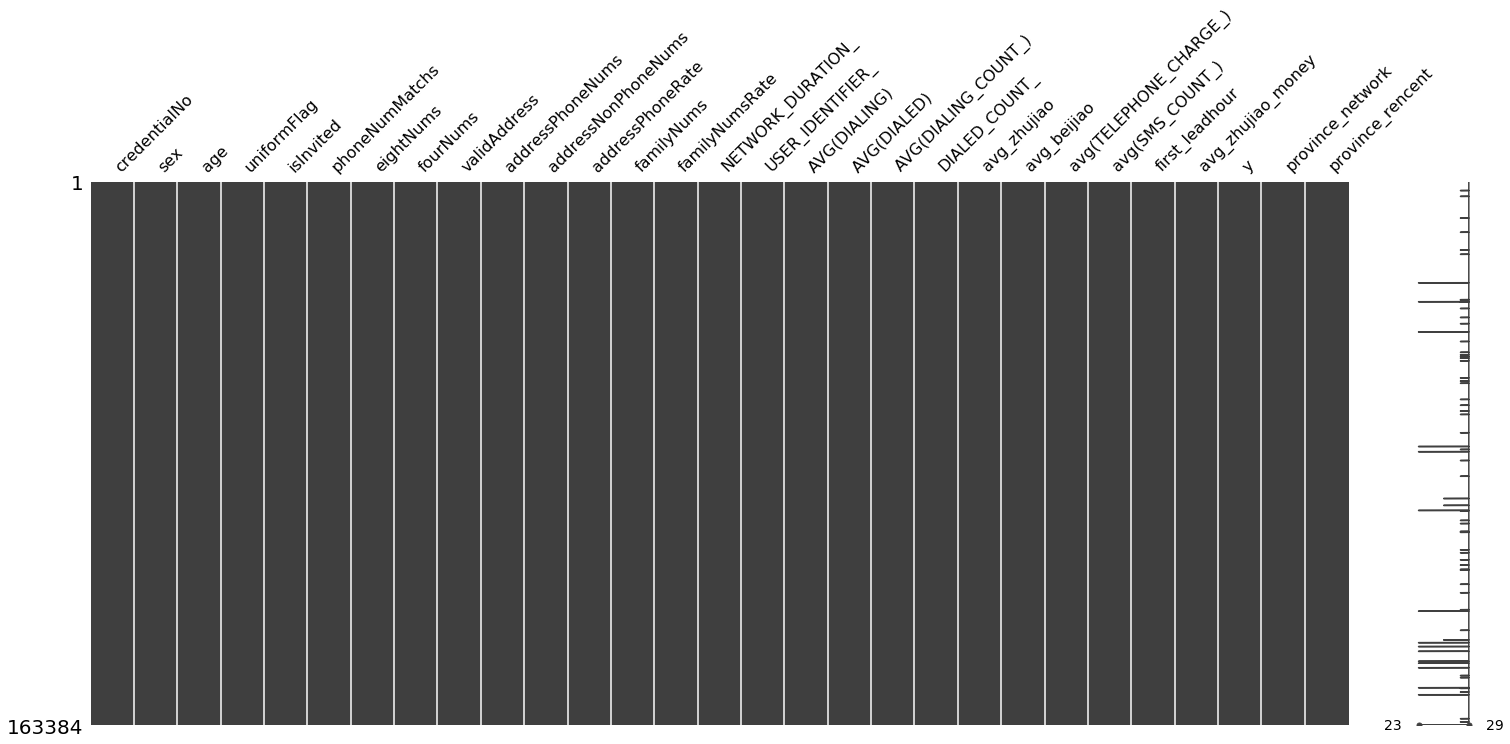

,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [5]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
first_data2

In [6]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2 =first_data2.dropna(axis=0)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:




zhima=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\zhima.csv",sep=",",encoding="gbk")
zhima=zhima[["USER_IDENTIFIER_","zhima"]]
final_data = zhima.merge(first_data2,on="USER_IDENTIFIER_")
# print(final_data.info())
final_data.columns
final_data

,USER_IDENTIFIER_,zhima,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
0,0000e3063e144e0b97540094f4153ae9,663,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
1,0001bdae47964e549cd3fb61895f4ae1,604,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
2,0002471215eb41fa861d0570cc32f282,673,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
3,00029b83ca5842eaac53312b35c2f6b4,625,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
4,0002aaa4191141fc89426e98c04efe7e,606,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
5,0002bb0ae76d461cbc33309241114637,611,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
6,0002e692546347139c59469730b3f2b7,669,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
7,0002f88cd9f6448882f2cd3d6a26bc3c,738,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
8,0003029afb0f485ab5dedbc42a43f872,661,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
9,00030baeb0324793b5f332d01db439a5,676,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


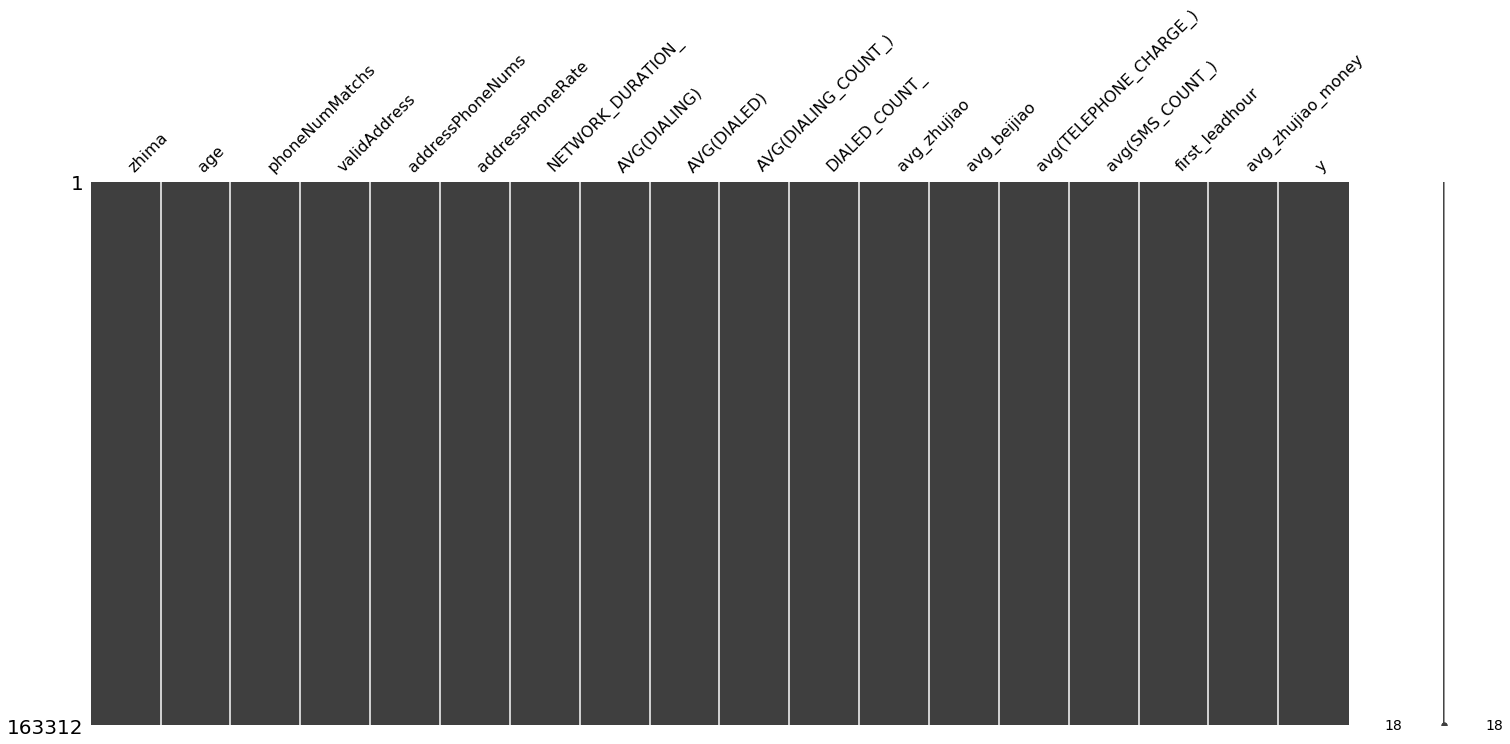

In [8]:
plot_data = final_data.drop(["USER_IDENTIFIER_","credentialNo","sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","province_network","province_rencent"],axis=1)
plot_data["zhima"]
missingno.matrix(plot_data)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
#gbdt参数设置
n_estimator=100
GBDT=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,subsample=0.5,max_depth=5)
LR=LogisticRegression()

In [30]:
from sklearn.cross_validation import train_test_split
GbdtData = final_data[["sex","avg_beijiao","avg(TELEPHONE_CHARGE_)","age","avg_zhujiao_money","phoneNumMatchs","addressPhoneNums","validAddress","NETWORK_DURATION_","zhima","addressPhoneRate","y"]]
x_train,x_test,y_train,y_test=train_test_split(GbdtData.drop(['y'],axis=1),GbdtData["y"],test_size=0.3)

In [31]:
GBDT.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

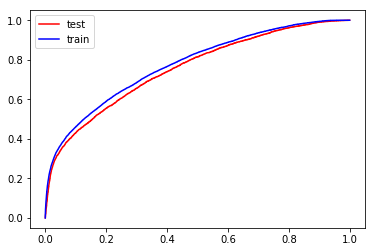

0.754495925579
train: 0.77518


In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve,roc_auc_score
fpr_gbdt,tpr_gbdt,_=roc_curve(y_test,GBDT.predict_proba(x_test)[:,1])
fpr_gbdt1,tpr_gbdt1,_=roc_curve(y_train,GBDT.predict_proba(x_train)[:,1])
plt.plot(fpr_gbdt,tpr_gbdt,color="red")
plt.plot(fpr_gbdt1,tpr_gbdt1,color="blue")
plt.legend(["test","train"])
plt.show()
print(auc(fpr_gbdt,tpr_gbdt))
# print("test: %.5g" % auc(fpr_gbdt,tpr_gbdt))
print("train: %.5g" % auc(fpr_gbdt1,tpr_gbdt1))